<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DIP Lab Assignment **10**
# N.Sai Karthik (AP21110010310) CSE-E



In [16]:
!pip install opencv-python-headless


In [17]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


Develop programs to implement
frequency domain smoothing filters (Ideal, Butterworth and Gaussian) and apply
these filters on a grayscale image.


a. Compare/comment on the
output of Ideal, Butterworth and Gaussian Low pass Filters having the same
radii (cutoff frequency) value.


b. Consider a suitable gray
scale image and demonstrate the ringing effect on the output of Ideal low pass
frequency domain filter.


c. Compare the output of
Butterworth low pass filters (order n=2) for different cutoff frequencies (5,
15, 30, 90, 120).

d. Compare the output of Gaussian low pass filters for
different cut-off frequencies (5, 15, 30, 90, and 120).

In [18]:
def load_image(image_path):
    image = cv2.imread("/content/drive/MyDrive/DIP /Lenna_(test_image).png", cv2.IMREAD_GRAYSCALE)
    return image


In [19]:
def apply_fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    return dft_shift

def inverse_fourier_transform(dft_shift):
    idft_shift = np.fft.ifftshift(dft_shift)
    img_back = np.fft.ifft2(idft_shift)
    img_back = np.abs(img_back)
    return img_back


In [20]:
def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if (i - crow) ** 2 + (j - ccol) ** 2 <= cutoff ** 2:
                mask[i, j] = 1
    return mask


In [21]:
def butterworth_low_pass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return mask


In [22]:
def gaussian_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask


In [23]:
def apply_filter(dft_shift, filter_mask):
    return dft_shift * filter_mask


In [24]:
def compare_filters(image, cutoff, order):
    dft_shift = apply_fourier_transform(image)
    shape = image.shape

    # Ideal
    ilpf = ideal_low_pass_filter(shape, cutoff)
    ideal_filtered = inverse_fourier_transform(apply_filter(dft_shift, ilpf))

    # Butterworth
    blpf = butterworth_low_pass_filter(shape, cutoff, order)
    butterworth_filtered = inverse_fourier_transform(apply_filter(dft_shift, blpf))

    # Gaussian
    glpf = gaussian_low_pass_filter(shape, cutoff)
    gaussian_filtered = inverse_fourier_transform(apply_filter(dft_shift, glpf))

    # Display
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
    plt.subplot(1, 4, 2), plt.imshow(ideal_filtered, cmap='gray'), plt.title('Ideal LPF')
    plt.subplot(1, 4, 3), plt.imshow(butterworth_filtered, cmap='gray'), plt.title(f'Butterworth LPF (n={order})')
    plt.subplot(1, 4, 4), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian LPF')
    plt.show()


In [25]:
def varying_cutoffs(image, filter_type, cutoffs, order=None):
    dft_shift = apply_fourier_transform(image)
    shape = image.shape

    plt.figure(figsize=(15, 8))
    for idx, cutoff in enumerate(cutoffs):
        if filter_type == 'Butterworth':
            mask = butterworth_low_pass_filter(shape, cutoff, order)
        elif filter_type == 'Gaussian':
            mask = gaussian_low_pass_filter(shape, cutoff)
        filtered_img = inverse_fourier_transform(apply_filter(dft_shift, mask))

        plt.subplot(1, len(cutoffs), idx + 1)
        plt.imshow(filtered_img, cmap='gray')
        plt.title(f'{filter_type} LPF (cutoff={cutoff})')
    plt.show()


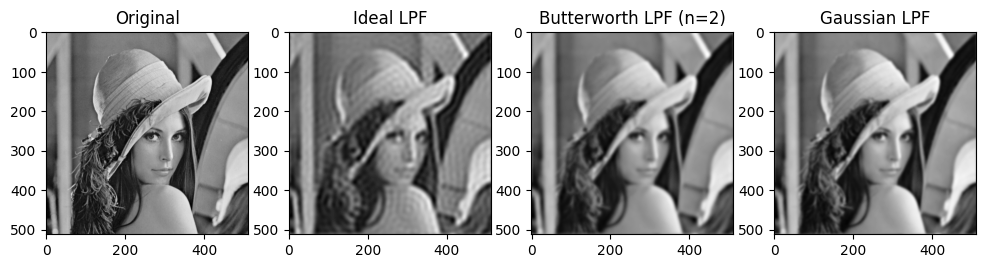

In [26]:
image = load_image('/content/drive/MyDrive/DIP /Lenna_(test_image).png')  # Replace with your image path

compare_filters(image, cutoff=30, order=2)




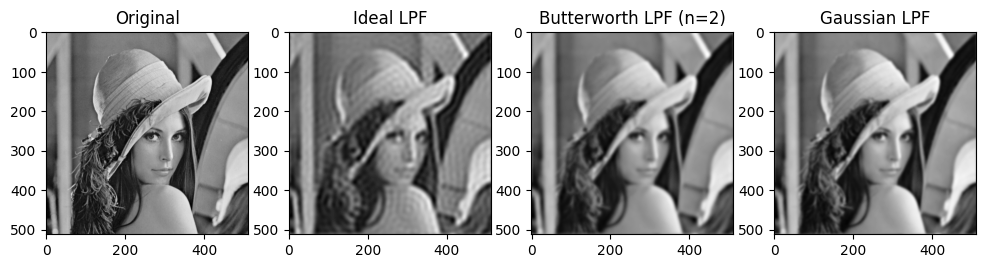

In [27]:
compare_filters(image, cutoff=30, order=2)


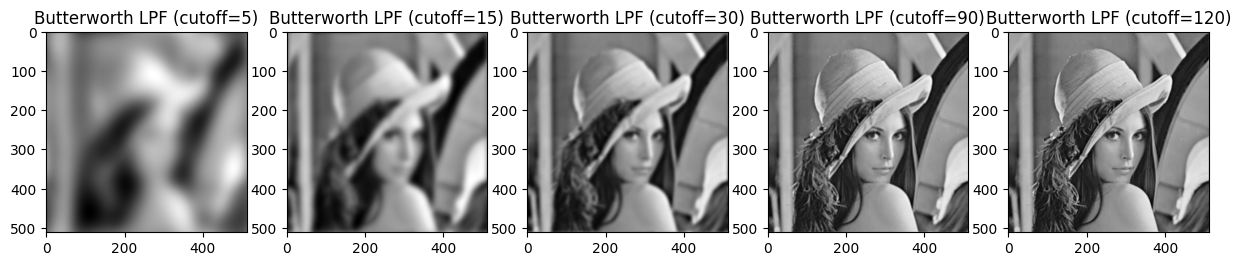

In [28]:

varying_cutoffs(image, 'Butterworth', cutoffs=[5, 15, 30, 90, 120], order=2)



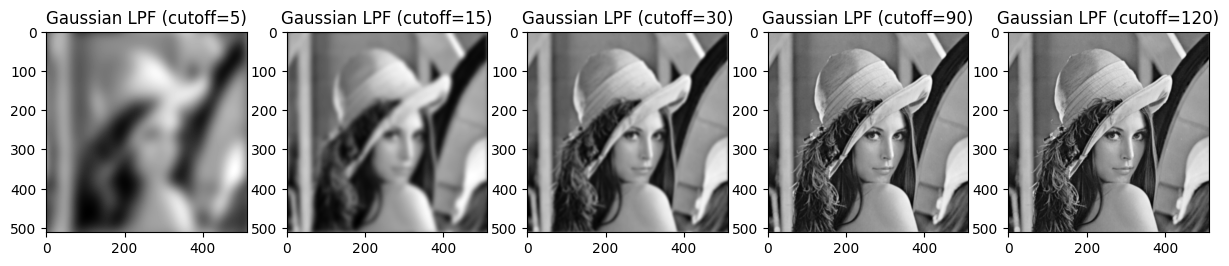

In [29]:
varying_cutoffs(image, 'Gaussian', cutoffs=[5, 15, 30, 90, 120])